In [1]:
import os
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join("data", "train_data.csv"))

In [3]:
def get_mapping_or_nan(value, mapping):
    try:
        return mapping[value]
    except:
        if value != "nan": print('Unexpected value "' + str(value) + '"')
        return np.nan
    
def any_to_num(value):
    ''' Tries to converts the argument into into a float, if the conversion fails returns the argument itself
    '''
    try:
        return float(value)
    except:
        return value

In [4]:
known_categories = {}

# admission_id - nothing to do here

# patient_id - nothing to do here

# race
known_categories['race'] = {}
known_categories['race']['type'] = "category"
known_categories['race']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'caucasian': 'white',
        'euro': 'white',
        'black': 'black',
        'other': 'other',
        'white': 'white',
        'africanamerican': 'black',
        'afro american': 'black',
        'african american': 'black',
        '?': np.nan,
        'european': 'white',
        'asian': 'asian',
        'hispanic': 'hispanic',
        'latino': 'hispanic',
    }
)

# gender
known_categories['gender'] = {}
known_categories['gender']['type'] = "category"
known_categories['gender']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'female': 'female',
        'male': 'male',
        'unknown/invalid': np.nan
    }
)

# age
known_categories['age'] = {}
known_categories['age']['type'] = "Int64"
known_categories['age']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        '[0-10)': 0,
        '[10-20)': 10,
        '[20-30)': 20,
        '[30-40)': 30,
        '[40-50)': 40,
        '[50-60)': 50,
        '[60-70)': 60,
        '[70-80)': 70,
        '[80-90)': 80,
        '[90-100)': 90
    }
)

# weight
known_categories['weight'] = {}
known_categories['weight']['type'] = "Int64"
known_categories['weight']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        '>200': 200,
        '?': np.nan,
        '[0-25)': 0,
        '[100-125)': 100,
        '[125-150)': 125,
        '[150-175)': 150,
        '[175-200)': 175,
        '[25-50)': 25,
        '[50-75)': 50,
        '[75-100)': 75
    }
)


# admission_type_code
known_categories['admission_type_code'] = {}
known_categories['admission_type_code']['type'] = "category"
known_categories['admission_type_code']['mapping'] = lambda value: get_mapping_or_nan(
    np.nan_to_num(any_to_num(value)), # np.nan_to_num returns 0 for NaN values
    {
        0: np.nan,
        1: 'Emergency',
        2: 'Urgent', # Isn't urgent the same as emergency?? Assuming, urgent is the same as emergency
        3: 'Elective',
        4: 'Newborn',
        5: np.nan, # 'Not Available',
        6: np.nan, # 'NULL'
        7: 'Trauma Center',
        8: np.nan # 'Not Mapped'
    }
)

# discharge_disposition_code
known_categories['discharge_disposition_code'] = {}
known_categories['discharge_disposition_code']['type'] = "category"
known_categories['discharge_disposition_code']['mapping'] = lambda value: get_mapping_or_nan(
    np.nan_to_num(any_to_num(value)), # np.nan_to_num returns 0 for NaN values
    {
        0: np.nan,
        1: 'Discharged to home',
        2: 'Discharged/transferred to another short term hospital',
        3: 'Discharged/transferred to SNF',
        4: 'Discharged/transferred to ICF',
        5: 'Discharged/transferred to another type of inpatient care institution',
        6: 'Discharged/transferred to home with home health service',
        7: 'Left AMA',
        8: 'Discharged/transferred to home under care of Home IV provider',
        9: 'Admitted as an inpatient to this hospital',
        10: 'Neonate discharged to another hospital for neonatal aftercare',
        11: 'Expired',
        12: 'Still patient or expected to return for outpatient services',
        13: 'Hospice / home',
        14: 'Hospice / medical facility',
        15: 'Discharged/transferred within this institution to Medicare approved swing bed',
        16: 'Discharged/transferred/referred another institution for outpatient services',
        17: 'Discharged/transferred/referred to this institution for outpatient services',
        18: np.nan, #'NULL',
        19: 'Expired at home. Medicaid only: hospice',
        20: 'Expired in a medical facility. Medicaid only: hospice',
        21: 'Expired: place unknown. Medicaid only: hospice',
        22: 'Discharged/transferred to another rehab fac including rehab units of a hospital',
        23: 'Discharged/transferred to a long term care hospital',
        24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
        25: np.nan, #'Not Mapped',
        26: np.nan, #'Unknown/Invalid',
        30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
        27: 'Discharged/transferred to a federal health care facility',
        28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
        29: 'Discharged/transferred to a Critical Access Hospital (CAH)',
    }
)

# admission_source_code
known_categories['admission_source_code'] = {}
known_categories['admission_source_code']['type'] = "category"
known_categories['admission_source_code']['mapping'] = lambda value: get_mapping_or_nan(
    np.nan_to_num(any_to_num(value)), # np.nan_to_num returns 0 for NaN values
    {
        0: np.nan,
        1: 'Physician Referral',
        2: 'Clinic Referral',
        3: 'HMO Referral',
        4: 'Transfer from a hospital',
        5: 'Transfer from a Skilled Nursing Facility (SNF)',
        6: 'Transfer from another health care facility',
        7: 'Emergency Room',
        8: 'Court/Law Enforcement',
        9: np.nan, #'Not Available',
        10: 'Transfer from critial access hospital',
        11: 'Normal Delivery',
        12: 'Premature Delivery',
        13: 'Sick Baby',
        14: 'Extramural Birth',
        15: np.nan, # 'Not Available',
        17: np.nan, # 'NULL',
        18: 'Transfer From Another Home Health Agency',
        19: 'Readmission to Same Home Health Agency',
        20: np.nan, # 'Not Mapped',
        21: np.nan, #'Unknown/Invalid',
        22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
        23: 'Born inside this hospital',
        24: 'Born outside this hospital',
        25: 'Transfer from Ambulatory Surgery Center',
        26: 'Transfer from Hospice',
    }
)

# time_in_hospital - nothing to do here

# payer_code
known_categories['payer_code'] = {}
known_categories['payer_code']['type'] = "category"
known_categories['payer_code']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        '?': np.nan,
        'bc': 'BC',
        'ch': 'CH',
        'cm': 'CM',
        'cp': 'CP',
        'dm': 'DM',
        'fr': 'FR',
        'hm': 'HM',
        'mc': 'MC',
        'md': 'MD',
        'mp': 'MP',
        'og': 'OG',
        'ot': 'OT',
        'po': 'PO',
        'si': 'SI',
        'sp': 'SP',
        'un': 'UN',
        'wc': 'WC'
    }
)

# medical_specialty
known_categories['medical_specialty'] = {}
known_categories['medical_specialty']['type'] = "category"
known_categories['medical_specialty']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        '?': np.nan,
        
        # Anesthesiology
        'anesthesiology': 'Anesthesiology',
        'anesthesiology-pediatric': 'Anesthesiology',

        # Cardiology
        'cardiology': 'Cardiology',
        'cardiology-pediatric': 'Cardiology',
        
        # Endocrinology
        'endocrinology': 'Endocrinology',
        'endocrinology-metabolism': 'Endocrinology',

        # Hematology
        'hematology': 'Hematology',
        'hematology/oncology': 'Hematology',

        # Gynecology/Obstetrics 
        'obstetrics': 'Gynecology/Obstetrics',
        'obsterics&gynecology-gynecologicOnco': 'Gynecology/Obstetrics',
        'obstetricsandgynecology': 'Gynecology/Obstetrics',
        'obsterics&gynecology-gynecologiconco': 'Gynecology/Obstetrics',
        'gynecology': 'Gynecology/Obstetrics',

        # Orthopedics
        'orthopedics': 'Orthopedics',
        'orthopedics-reconstructive': 'Orthopedics',

        # Pediatrics 
        'pediatrics': 'Pediatrics',
        'pediatrics-criticalcare': 'Pediatrics',
        'pediatrics-hematology-oncology': 'Pediatrics',
        'pediatrics-pulmonology': 'Pediatrics',
        'pediatrics-endocrinology': 'Pediatrics',
        'pediatrics-emergencymedicine': 'Pediatrics',
        'pediatrics-neurology': 'Pediatrics',
        'pediatrics-allergyandimmunology': 'Pediatrics',

        # PhysicalMedicine 
        'physicalmedicineandrehabilitation': 'PhysicalMedicine',
        'physiciannotfound': 'PhysicalMedicine',

        # Psychiatry
        'psychiatry': 'Psychiatry',
        'psychiatry-child/adolescent': 'Psychiatry',
        'psychology': 'Psychiatry',
        'psychiatry-addictive': 'Psychiatry',
        
        # Radiology
        'radiologist': 'Radiology',
        'radiology': 'Radiology',

        # Surgery
        'surgeon': 'Surgery',
        'surgery-cardiovascular': 'Surgery',
        'surgery-cardiovascular/thoracic': 'Surgery',
        'surgery-colon&rectal': 'Surgery',
        'surgery-general': 'Surgery',
        'surgery-maxillofacial': 'Surgery',
        'surgery-neuro': 'Surgery',
        'surgery-pediatric': 'Surgery',
        'surgery-plastic': 'Surgery',
        'surgery-thoracic': 'Surgery',
        'surgery-vascular': 'Surgery',
        'surgicalspecialty': 'Surgery',
        
        # Others
        'allergyandimmunology': 'Others', # 10 or less occurrences
        'dcpteam': 'Others',              # 10 or less occurrences - ??
        'dentistry': 'Others',            # 10 or less occurrences
        'dermatology': 'Others',          # 1 occurrence
        'neurophysiology': 'Others',      # 1 occurrence
        'outreachservices': 'Others',     # 10 or less occurrences - ??
        'perinatology': 'Others',         # 1 occurrence
        'proctology': 'Others',           # 1 occurrence
        'resident': 'Others',             # 1 occurrence - ??
        'speech': 'Others',               # 1 occurrence
        'sportsmedicine': 'Others',       # 1 occurrence
        'hospitalist': 'Others',          # 44 occurrences - ??
        'osteopath': 'Others',            # 29 occurrences
        'rheumatology': 'Others',         # 14 occurrences
        'otolaryngology': 'Others',       # 26 occurrences
        'pathology': 'Others',            # 16 occurrences
        
        # Ungrouped specialties
        'emergency/trauma': 'Emergency/Trauma',
        'family/generalpractice': 'Family/GeneralPractice',
        'gastroenterology': 'Gastroenterology',
        'infectiousdiseases': 'InfectiousDiseases',
        'internalmedicine': 'InternalMedicine',
        'nephrology': 'Nephrology',
        'neurology': 'Neurology',
        'oncology': 'Oncology',
        'ophthalmology': 'Ophthalmology',
        'podiatry': 'Podiatry',
        'pulmonology': 'Pulmonology',
        'urology': 'Urology'
    }
)

# has_prosthesis - nothing to do here

# complete_vaccination_status
known_categories['complete_vaccination_status'] = {}
known_categories['complete_vaccination_status']['type'] = pd.CategoricalDtype(['none', 'incomplete', 'complete'], ordered=True)
known_categories['complete_vaccination_status']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'none': 'none',
        'incomplete': 'incomplete',
        'complete': 'complete'
    }
)

# num_lab_procedures
known_categories['num_lab_procedures'] = {}
known_categories['num_lab_procedures']['type'] = "Int64"
known_categories['num_lab_procedures']['mapping'] = lambda value: value

# num_procedures - nothing to do here

# num_medications
known_categories['num_medications'] = {}
known_categories['num_medications']['type'] = "Int64"
known_categories['num_medications']['mapping'] = lambda value: value

# number_outpatient - nothing to do here

# number_emergency - nothing to do here

# number_inpatient - nothing to do here

# diag_1, diag_2, diag_3
def icd9_group(icd9_code):
    ''' Converts a given ICD9 code into its group. Returns None if there is no match
    '''
    if icd9_code is None or icd9_code == '?': return np.nan
    
    value_ = any_to_num(str(icd9_code).lower())
    if type(value_) is str:
        if value_.startswith('v') or value_.startswith('e'): return 'external causes of injury'
    else:
        code = np.nan_to_num(value_)
        if code == 0: return np.nan
        if code >= 1 and code <= 139: return 'infectious and parasitic diseases'
        if code >= 140 and code <= 239: return 'neoplasms'
        if code >= 240 and code <= 279: return 'endocrine, nutritional and metabolic diseases, and immunity disorders'
        if code >= 280 and code <= 289: return 'diseases of the blood and blood-forming organs'
        if code >= 290 and code <= 319: return 'mental disorders'
        if code >= 320 and code <= 389: return 'diseases of the nervous system and sense organs'
        if code >= 390 and code <= 459: return 'diseases of the circulatory system'
        if code >= 460 and code <= 519: return 'diseases of the respiratory system'
        if code >= 520 and code <= 579: return 'diseases of the digestive system'
        if code >= 580 and code <= 629: return 'diseases of the genitourinary system'
        if code >= 630 and code <= 679: return 'complications of pregnancy, childbirth, and the puerperium'
        if code >= 680 and code <= 709: return 'diseases of the skin and subcutaneous tissue'
        if code >= 710 and code <= 739: return 'diseases of the musculoskeletal system and connective tissue'
        if code >= 740 and code <= 759: return 'congenital anomalies'
        if code >= 760 and code <= 779: return 'certain conditions originating in the perinatal period'
        if code >= 780 and code <= 799: return 'symptoms, signs, and ill-defined conditions'
        if code >= 800 and code <= 999: return 'injury and poisoning'

    print('Invalid ICD9 code ' + icd9_code)
    return np.nan

known_categories['diag_1'] = {}
known_categories['diag_1']['type'] = "category"
known_categories['diag_1']['mapping'] = lambda value: icd9_group(value)

known_categories['diag_2'] = {}
known_categories['diag_2']['type'] = "category"
known_categories['diag_2']['mapping'] = lambda value: icd9_group(value)

known_categories['diag_3'] = {}
known_categories['diag_3']['type'] = "category"
known_categories['diag_3']['mapping'] = lambda value: icd9_group(value)


# number_diagnoses - nothing to do here

# blood_type
known_categories['blood_type'] = {}
known_categories['blood_type']['type'] = "category"
known_categories['blood_type']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'a+': 'A+',
        'a-': 'A-',
        'ab+': 'AB+',
        'ab-': 'AB-',
        'b+': 'B+',
        'b-': 'B-',
        'o+': 'O+',
        'o-': 'O-',
    }
)

# hemoglobin_level - nothing to do here

# blood_transfusion - nothing to do here

# max_glu_serum
known_categories['max_glu_serum'] = {}
known_categories['max_glu_serum']['type'] = "category"
known_categories['max_glu_serum']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        '>200': '>200',
        '>300': '>300',
        'norm': 'normal',
        'none': np.nan
    }
)

# A1Cresult
known_categories['A1Cresult'] = {}
known_categories['A1Cresult']['type'] = "category"
known_categories['A1Cresult']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        '>7': '>7',
        '>8': '>8',
        'norm': 'normal',
        'none': np.nan
    }
)

# diuretics
known_categories['diuretics'] = {}
known_categories['diuretics']['type'] = "bool"
known_categories['diuretics']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'yes': True,
        'no': False
    }
)

# insulin
known_categories['insulin'] = {}
known_categories['insulin']['type'] = "bool"
known_categories['insulin']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'yes': True,
        'no': False
    }
)

# change
known_categories['change'] = {}
known_categories['change']['type'] = "bool"
known_categories['change']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'ch': True,
        'no': False
    }
)

# diabetesMed
known_categories['diabetesMed'] = {}
known_categories['diabetesMed']['type'] = "bool"
known_categories['diabetesMed']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'yes': True,
        'no': False
    }
)

# readmitted
known_categories['readmitted'] = {}
known_categories['readmitted']['type'] = "bool"
known_categories['readmitted']['mapping'] = lambda value: get_mapping_or_nan(
    str(value).lower(), 
    {
        'yes': True,
        'no': False
    }
)

In [5]:
df_clean = df.copy()

for column in known_categories.keys():
    df_clean[column] = (df[column]
                        .apply(lambda value: known_categories[column]['mapping'](value))
                        .astype(known_categories[column]['type'])
                       )

In [80]:
df_clean.to_csv('data/preprocessed.csv')

In [6]:
# ProfileReport(df_clean, title="Fix missing values").to_file("reports/fix_missing_values2.html")

# General Analysis

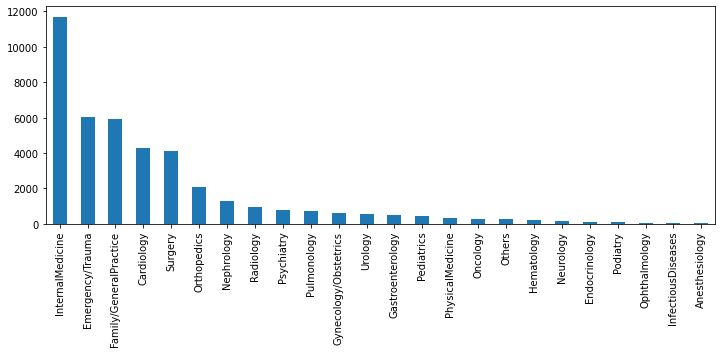

In [7]:
# High Cardinality - medical specialty figure
df_clean.medical_specialty.value_counts().plot(kind='bar', figsize=(12, 4));
# plt.savefig("images/medical_specialty_cardinality.pdf")

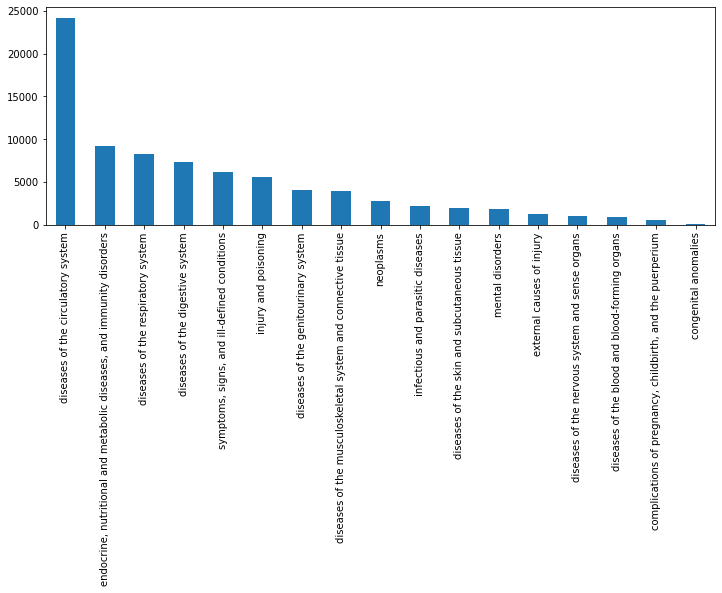

In [8]:
# High Cardinality - ICD9 codes
df_clean.diag_1.value_counts().plot(kind='bar', figsize=(12, 4));

In [9]:
def get_patients_with_two_or_more_encounters(df):
    patients = df.patient_id.unique()

    duplicated = []
    for patient in patients:
        if (df.patient_id == patient).sum() > 1:
            duplicated.append(patient)
    
    return duplicated
            
def validate_static_columns_integrity(df, patients_with_two_or_more_encounters):
    corrupted = []
    for patient in patients_with_two_or_more_encounters:
        encounters = df[df.patient_id == patient]

        static_columns = ['blood_type'] #['race', 'gender', 'blood_type']
        
        column = 'blood_type'
        #for column in static_columns:
        values = list(encounters[column].values)
        if values.count(values[0]) != len(values):
            #print('Inconsistency found for patient ' + str(patient) + ' on column "' + column + '": ' + str(values))
            corrupted.append(patient)
            #break
            continue
    
    return corrupted

In [10]:
duplicated_patients_clean = get_patients_with_two_or_more_encounters(df_clean)

df_readmitted = df_clean[df_clean.readmitted]
duplicated_patients_readmitted = get_patients_with_two_or_more_encounters(df_readmitted)

In [12]:
# Corrupted Patients - Patients with more than one encounter that have mismatiching blood_type info
corrupted_patients_clean = validate_static_columns_integrity(df_clean, duplicated_patients_clean)

# Corrupted Readmitted atients - Patients with more than one READMITTED encounter that have mismatiching blood_type info 
corrupted_patients_readmitted = validate_static_columns_integrity(df_readmitted, duplicated_patients_readmitted)


In [13]:
# Pristine medical encounters
pristine_medical_encouters = df_clean[~df_clean.patient_id.isin(corrupted_patients_clean)]
pristine_medical_encouters_count = pristine_medical_encouters.shape[0]

# Medical encounters of corrupted patients
corrupted_medical_encouters = df_clean[df_clean.patient_id.isin(corrupted_patients_clean)]
corrupted_medical_encouters_count = corrupted_medical_encouters.shape[0]

# Medical encounters of corrupted READMITTED patients
readmitted_corrupted_medical_encouters = df_clean[df_clean.patient_id.isin(corrupted_patients_readmitted)]
readmitted_corrupted_medical_encouters_count = readmitted_corrupted_medical_encouters.shape[0]

print(pristine_medical_encouters_count)
print(corrupted_medical_encouters_count)
print(readmitted_corrupted_medical_encouters_count)

#(52981, 34)
#(28431, 34)
#(4280, 34)

52981
28431
4280


[28431, 52981]


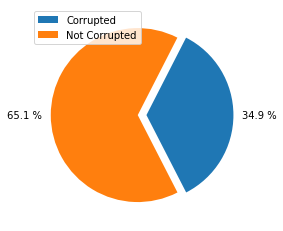

In [76]:
# Pie chart

# Medical encounters
y_values = [28431, (81412 - 28431)]
print(y_values)
plt.pie(
    y_values,
    startangle = 297.18, 
    labels = [
        str(round(100 * (y_values[0] / 81412), 1)) + " %", 
        str(round(100 * (y_values[1] / 81412), 1)) + " %"
    ],
    explode = [0.1, 0]
)
plt.legend(["Corrupted", "Not Corrupted"])

plt.gcf().set_size_inches(4,4)
plt.gcf().savefig("images/pie1.pdf")
plt.gcf().set_size_inches(4,4)

plt.show()

In [15]:
# Corrupted medical encounters for...
    # patients with zero readmitted encounters
    # patients with only one readmitted encounter
    # patients with more than one readmitted encounter (but the readmitted encounters are matched) -
    # - calculated already - patients with more than one readmitted encounter: 4280 - readmitted_corrupted_medical_encouters_count

readmitted_count = corrupted_medical_encouters.groupby('patient_id').sum()['readmitted']

print(df_clean[df_clean.patient_id.isin(readmitted_count[readmitted_count == 0].index)].shape[0])
print(df_clean[df_clean.patient_id.isin(readmitted_count[readmitted_count == 1].index)].shape[0])
print(df_clean[df_clean.patient_id.isin(readmitted_count[readmitted_count > 1].index)].shape[0])


14136
9153
5142


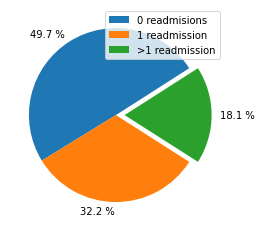

In [77]:
# Corrupted medical encounters for...
    # patients with zero readmitted encounters
    # patients with only one readmitted encounter
    # patients with more than one readmitted encounter (but the readmitted encounters are matched) -
    # - calculated already - patients with more than one readmitted encounter: 4280 - readmitted_corrupted_medical_encouters_count

y_values = [14136, 9153, 5142] #4280, 5142 - 4280]
pie = plt.pie(
    y_values,
    labels = [
        str(round(100 * (y_values[0] / 28431), 1)) + " %", 
        str(round(100 * (y_values[1] / 28431), 1)) + " %",
        str(round(100 * (y_values[2] / 28431), 1)) + " %"
    ],
    startangle = 32.58,
    explode = [0, 0, 0.1]
)
plt.legend([
        "0 readmisions",
        "1 readmission",
        ">1 readmission"
    ])

plt.gcf().set_size_inches(4,4)
plt.gcf().savefig("images/pie2.pdf")
plt.gcf().set_size_inches(4,4)

plt.show()




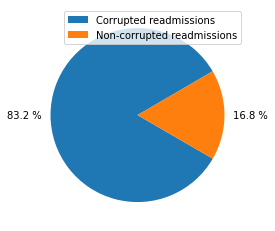

In [78]:
# Corrupted medical encounters for...
    # patients with zero readmitted encounters
    # patients with only one readmitted encounter
    # patients with more than one readmitted encounter (but the readmitted encounters are matched) -
    # - calculated already - patients with more than one readmitted encounter: 4280 - readmitted_corrupted_medical_encouters_count

y_values = [4280, 5142 - 4280]
pie = plt.pie(
    y_values,
    labels = [
        str(round(100 * (y_values[0] / 5142), 1)) + " %", 
        str(round(100 * (y_values[1] / 5142), 1)) + " %"
    ],
    startangle = 30.24
)
plt.legend([
        "Corrupted readmissions", 
        "Non-corrupted readmissions"
    ])

plt.gcf().set_size_inches(4,4)
plt.gcf().savefig("images/pie3.pdf")
plt.gcf().set_size_inches(4,4)

plt.show()


In [ ]:
# Fazer drop em função do discharge code